In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input/food41/images/pizza'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
for dirname, _, filenames in os.walk('/kaggle/input/food41/images/french_fries'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
                                      
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/food41/images/pizza/768276.jpg
/kaggle/input/food41/images/pizza/1245628.jpg
/kaggle/input/food41/images/pizza/3767723.jpg
/kaggle/input/food41/images/pizza/1138936.jpg
/kaggle/input/food41/images/pizza/226472.jpg
/kaggle/input/food41/images/pizza/1380247.jpg
/kaggle/input/food41/images/pizza/1220156.jpg
/kaggle/input/food41/images/pizza/540882.jpg
/kaggle/input/food41/images/pizza/1763205.jpg
/kaggle/input/food41/images/pizza/702165.jpg
/kaggle/input/food41/images/pizza/2330965.jpg
/kaggle/input/food41/images/pizza/96357.jpg
/kaggle/input/food41/images/pizza/1638227.jpg
/kaggle/input/food41/images/pizza/221048.jpg
/kaggle/input/food41/images/pizza/2621534.jpg
/kaggle/input/food41/images/pizza/2844278.jpg
/kaggle/input/food41/images/pizza/2501636.jpg
/kaggle/input/food41/images/pizza/2218680.jpg
/kaggle/input/food41/images/pizza/1069629.jpg
/kaggle/input/food41/images/pizza/1284978.jpg
/kaggle/input/food41/images/pizza/2508316.jpg
/kaggle/input/food41/images/pizza/138855.

#### Q4. From this food images ("../input/food41/images"), please create an image classifier to classify 2 types of food choosing by yourself. (Show me the accuracy of each type of food) 
<b><font color=red>Both types of food must be more than 50% to get full score.</font></b>

เฟ้นฟาย + ฟิซซ่าที่มีไอติม

In [2]:
import glob
pizza = glob.glob("../input/food41/images/pizza/*.*")
french_fries = glob.glob("../input/food41/images/french_fries/*.*")
pizza[0] # คนที่ 0

'../input/food41/images/pizza/768276.jpg'

In [3]:
french_fries[154]

'../input/food41/images/french_fries/2644820.jpg'

In [4]:
#label = np.array([float(item.split("_")[-1].split(".")[0]) for item in filename])

# train data

In [5]:
rm -rf train/pizza

In [6]:
rm -rf test/pizza

In [7]:
rm -rf train/french_fries

In [8]:
rm -rf test/french_fries

In [9]:
rm -rf test

In [10]:
rm -rf train

In [11]:
len(french_fries)

1000

In [12]:
len(pizza)

1000

In [13]:
!mkdir train
!mkdir train/pizza
!mkdir train/french_fries

In [14]:
# 0.8 & 0.2
import shutil
for i in range(len(pizza)-200):
        shutil.copy(pizza[i], '/kaggle/working/train/pizza')
for i in range(len(french_fries)-200):
        shutil.copy(french_fries[i], '/kaggle/working/train/french_fries')

In [15]:
!ls /kaggle/working/train/pizza/* | wc -l

800


In [16]:
!ls ./train/pizza/1001116.jpg

./train/pizza/1001116.jpg


# test data

In [17]:
!mkdir test
!mkdir test/pizza
!mkdir test/french_fries

!rmdir test
!rmdir test/male
!rmdir test/female

In [18]:
# ใช้ได้ 0-799 เหลือ 800-999
import shutil
for i in range(800,len(pizza)):
        shutil.copy(pizza[i], '/kaggle/working/test/pizza')
for i in range(800,len(french_fries)):
        shutil.copy(french_fries[i], '/kaggle/working/test/french_fries')

In [19]:
!ls /kaggle/working/test/pizza/* | wc -l

200


----------------------

# model

In [20]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
data_generator = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        #rescale = 1.0/255.0,   # Intensity Normalized
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False,   # randomly flip images
        validation_split=0.2)

2021-10-18 13:48:39.379004: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0


In [21]:
train_dir = './train'

batch_size = 45 # ส่งไปเทรนทีละ5 เพราะมีรูป ผญ 15 คน
img_height = 100
img_width  = 100
train_generator = data_generator.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='training') # set as training data

validation_generator = data_generator.flow_from_directory(
    train_dir, # same directory as training data
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='validation') # set as validation data

Found 1280 images belonging to 2 classes.
Found 320 images belonging to 2 classes.


In [22]:
train_generator.class_indices

{'french_fries': 0, 'pizza': 1}

# train

In [23]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation
# preparing the layers in the Convolutional Deep Neural Network
def create_model():
    tf.random.set_seed(0)
    tf.compat.v1.reset_default_graph() # Clear Model
    model = Sequential()
    model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu', input_shape = train_generator.image_shape)) 
    # Conv2Dตัวสกัดfilters
    model.add(MaxPooling2D(pool_size = (2, 2)))
    #ย่อภาพลงมา
    
    model.add(Conv2D(filters = 16, kernel_size = (3, 3), activation = 'relu'))
    model.add(Conv2D(filters = 8, kernel_size = (3, 3), activation = 'relu'))
    model.add(MaxPooling2D(pool_size = (2, 2)))
    model.add(Dropout(rate = 0.15))
    
    model.add(Flatten())
    #ตบถาพให้แบนเป็น2มิติลงมา
    
    model.add(Dense(units = 64, activation = 'relu'))
    model.add(Dense(units = 32, activation = 'relu'))
    model.add(Dense(units = 16, activation = 'relu'))
    model.add(Dropout(rate = 0.1))
    
    model.add(Dense(units = 1, activation = 'sigmoid'))
    model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return model

In [24]:
model = create_model()

2021-10-18 13:48:43.527012: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-10-18 13:48:43.530393: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-10-18 13:48:43.567252: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-18 13:48:43.567896: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla P100-PCIE-16GB computeCapability: 6.0
coreClock: 1.3285GHz coreCount: 56 deviceMemorySize: 15.90GiB deviceMemoryBandwidth: 681.88GiB/s
2021-10-18 13:48:43.567955: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2021-10-18 13:48:43.616235: I tensorflow/stream_executor/platform/def

In [25]:
fitted_model = model.fit_generator(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    validation_data = validation_generator, 
    validation_steps = validation_generator.samples // batch_size,
    epochs = 50)

/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
2021-10-18 13:48:46.128690: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2021-10-18 13:48:46.134050: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2000175000 Hz


Epoch 1/50


2021-10-18 13:48:46.907717: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.11
2021-10-18 13:48:47.748030: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublasLt.so.11
2021-10-18 13:48:47.784402: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudnn.so.8


28/28 [==============================] - 16s 348ms/step - loss: 1.7892 - accuracy: 0.5114 - val_loss: 0.7143 - val_accuracy: 0.5556
Epoch 2/50
28/28 [==============================] - 9s 341ms/step - loss: 0.6987 - accuracy: 0.5282 - val_loss: 0.6905 - val_accuracy: 0.5175
Epoch 3/50
28/28 [==============================] - 10s 360ms/step - loss: 0.6912 - accuracy: 0.5332 - val_loss: 0.6925 - val_accuracy: 0.5143
Epoch 4/50
28/28 [==============================] - 9s 339ms/step - loss: 0.6910 - accuracy: 0.5185 - val_loss: 0.6962 - val_accuracy: 0.5016
Epoch 5/50
28/28 [==============================] - 9s 335ms/step - loss: 0.6818 - accuracy: 0.5513 - val_loss: 0.6960 - val_accuracy: 0.5556
Epoch 6/50
28/28 [==============================] - 9s 339ms/step - loss: 0.6842 - accuracy: 0.5460 - val_loss: 0.6896 - val_accuracy: 0.4921
Epoch 7/50
28/28 [==============================] - 10s 359ms/step - loss: 0.6875 - accuracy: 0.5791 - val_loss: 0.7082 - val_accuracy: 0.5302
Epoch 8/50
28/

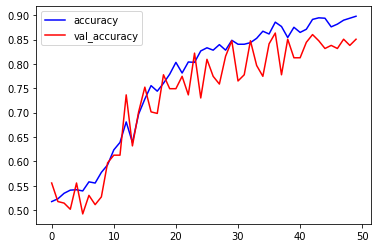

In [26]:
import matplotlib.pyplot as plt
# plotting accuracy and validation accuracy
accuracy = fitted_model.history['accuracy']
val_accuracy = fitted_model.history['val_accuracy']
plt.plot(range(len(accuracy)), accuracy, 'b-', label = 'accuracy')
plt.plot(range(len(val_accuracy)), val_accuracy, 'r-', label = 'val_accuracy')
plt.legend()

-------------------

In [27]:
import glob
filepizza = glob.glob("../input/food41/images/pizza/*.*")
filefrench_fries = glob.glob("../input/food41/images/french_fries/*.*")

In [28]:
from tensorflow.keras.preprocessing import image
# testing the model
ppizza = []
for filename in filepizza:
    test_image = image.load_img(filename, target_size = (img_height, img_width))
    test_image = image.img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis = 0)
    ppizza.append(np.round(model.predict(test_image)[0][0]))
ppizza = np.array(ppizza)
sum(ppizza==1)/len(pizza)

0.941

In [29]:
pfrench_fries = []
for filename in filefrench_fries:
    test_image = image.load_img(filename, target_size = (img_height, img_width))
    test_image = image.img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis = 0)
    pfrench_fries.append(np.round(model.predict(test_image)[0][0]))
pfrench_fries = np.array(pfrench_fries)
sum(pfrench_fries==0)/len(french_fries)

0.884

{'french_fries': 0, 'pizza': 1}